# Proyecto CNN

##### Statistical Learning II
##### Gustavo Alvarado
##### Carnet # 20063401 

## Tema 
Clasificación de jerogrlíficos egipcios

## Fuentes de datos

* Data set de jeroglíficos egipcios conocido como la lista de Gardiner. https://www.kaggle.com/datasets/86e49b2809914eb79a26f5a93eecda627089e54796a652af464d69f6eaafaf18

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Obteniendo dataset

In [4]:
strDataTrain = '/content/gdrive/My Drive/SLII/Project/Egyptian Hieroglyphs/Train'
strDataTest =  '/content/gdrive/My Drive/SLII/Project/Egyptian Hieroglyphs/Test'

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255.,
)
#configuracion de imagenes de entrada para train
train_set = datagen.flow_from_directory(
    strDataTrain,
    target_size=(200,233),
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

#configuracion de imagenes de entrada para test
test_set = datagen.flow_from_directory(
    strDataTest,
    target_size=(200,233),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 3890 images belonging to 95 classes.
Found 1039 images belonging to 95 classes.


In [6]:
train_set.class_indices

{'100': 0,
 'Her': 1,
 'Woman': 2,
 'among': 3,
 'angry': 4,
 'ankh': 5,
 'aroura': 6,
 'at': 7,
 'bad thinking': 8,
 'bandage': 9,
 'bee': 10,
 'belongs': 11,
 'birth': 12,
 'board game': 13,
 'book': 14,
 'boy': 15,
 'branch': 16,
 'bread': 17,
 'brewer': 18,
 'builder': 19,
 'bury': 20,
 'canal': 21,
 'cloth on pole': 22,
 'cobra': 23,
 'composite_bow': 24,
 'cooked': 25,
 'corpse': 26,
 'dessert': 27,
 'divide': 28,
 'duck': 29,
 'elephant': 30,
 'enclosed mound': 31,
 'eye': 32,
 'fabric': 33,
 'face': 34,
 'falcon': 35,
 'fingre': 36,
 'fish': 37,
 'flail': 38,
 'folded': 39,
 'foot': 40,
 'galena': 41,
 'giraffe': 42,
 'he': 43,
 'hit': 44,
 'horn': 45,
 'king': 46,
 'leg': 47,
 'length of a human arm': 48,
 'life spirit': 49,
 'limits': 50,
 'lion': 51,
 'lizard': 52,
 'loaf': 53,
 'loaf of bread': 54,
 'man': 55,
 'mascot': 56,
 'meet': 57,
 'mother': 58,
 'mouth': 59,
 'musical instrument': 60,
 'nile fish': 61,
 'not': 62,
 'now': 63,
 'nurse': 64,
 'nursing': 65,
 'occur': 

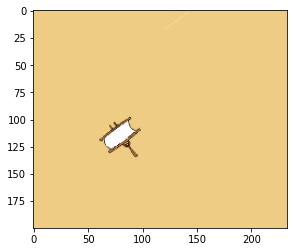

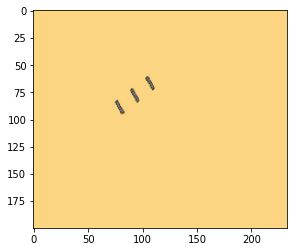

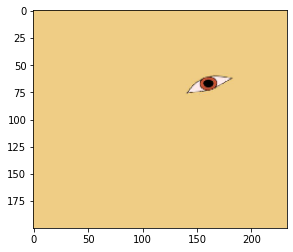

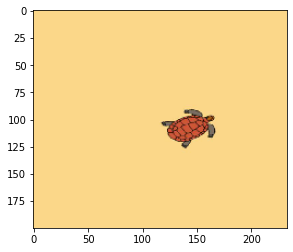

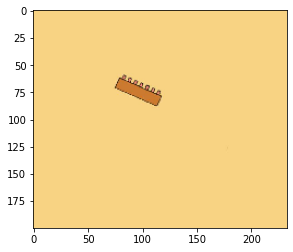

In [7]:
for _ in range(5):
    img, label = train_set.next()
    plt.imshow(img[0])
    plt.show()

## Red convolucional

In [8]:
cnn1 = Sequential()

cnn1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(200,233,3), activation="relu"))
cnn1.add(MaxPooling2D(pool_size=(3,3)))

cnn1.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
cnn1.add(MaxPooling2D(pool_size=(3,3)))

cnn1.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
cnn1.add(MaxPooling2D(pool_size=(3,3)))

cnn1.add(Flatten())
cnn1.add(Dense(units=64, activation='relu'))
cnn1.add(Dense(units=95, activation="softmax"))


In [9]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 231, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 66, 77, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 23, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 7, 64)         0

In [10]:
cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mae', 'accuracy'])

In [11]:
history1 = cnn1.fit(train_set, 
        steps_per_epoch = train_set.n // train_set.batch_size,
        epochs = 25,
        validation_data = test_set,
        validation_steps = test_set.n // test_set.batch_size)

Epoch 1/25
60/60 [==============================] - 3649s 62s/step - loss: 4.5540 - mae: 0.0208 - accuracy: 0.0123 - val_loss: 4.5354 - val_mae: 0.0208 - val_accuracy: 0.0127
Epoch 2/25
60/60 [==============================] - 32s 540ms/step - loss: 4.3752 - mae: 0.0206 - accuracy: 0.0143 - val_loss: 4.2162 - val_mae: 0.0205 - val_accuracy: 0.0293
Epoch 3/25
60/60 [==============================] - 32s 539ms/step - loss: 3.9723 - mae: 0.0204 - accuracy: 0.0489 - val_loss: 3.7163 - val_mae: 0.0201 - val_accuracy: 0.0771
Epoch 4/25
60/60 [==============================] - 33s 553ms/step - loss: 3.3749 - mae: 0.0196 - accuracy: 0.1150 - val_loss: 3.2674 - val_mae: 0.0194 - val_accuracy: 0.1182
Epoch 5/25
60/60 [==============================] - 32s 534ms/step - loss: 2.8648 - mae: 0.0186 - accuracy: 0.1858 - val_loss: 2.9126 - val_mae: 0.0186 - val_accuracy: 0.1904
Epoch 6/25
60/60 [==============================] - 33s 544ms/step - loss: 2.4339 - mae: 0.0174 - accuracy: 0.2734 - val_loss

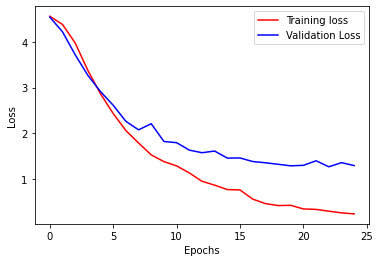

In [12]:
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

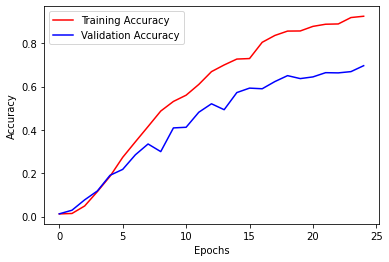

In [30]:
plt.plot(history1.history['accuracy'],'r')
plt.plot(history1.history['val_accuracy'],'b')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

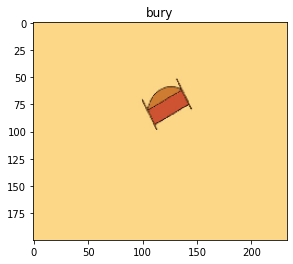

In [60]:
img1, _ = test_set.next()
img1Redim = np.expand_dims(img1[0], axis=0)
Y1 = cnn1.predict(img1Redim)
y1 = np.argmax(Y1, axis=1)
class1 = list(train_set.class_indices.keys())[list(train_set.class_indices.values()).index(y1[0])]
plt.title(class1)
plt.imshow(img1[0])
plt.show()

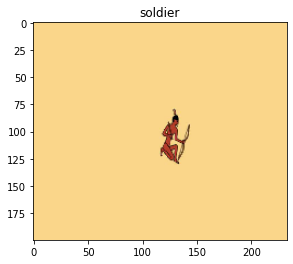

In [63]:
img2, _ = test_set.next()
img2Redim = np.expand_dims(img2[0], axis=0)
Y2 = cnn1.predict(img2Redim)
y2 = np.argmax(Y2, axis=1)
class2 = list(train_set.class_indices.keys())[list(train_set.class_indices.values()).index(y2[0])]
plt.title(class2)
plt.imshow(img2[0])
plt.show()

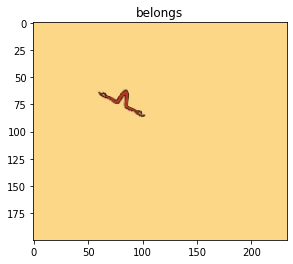

In [64]:
img3, _ = test_set.next()
img3Redim = np.expand_dims(img3[0], axis=0)
Y3 = cnn1.predict(img3Redim)
y3 = np.argmax(Y3, axis=1)
class3 = list(train_set.class_indices.keys())[list(train_set.class_indices.values()).index(y3[0])]
plt.title(class3)
plt.imshow(img3[0])
plt.show()

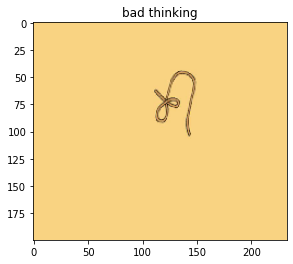

In [66]:
img4, _ = test_set.next()
img4Redim = np.expand_dims(img4[0], axis=0)
Y4 = cnn1.predict(img4Redim)
y4 = np.argmax(Y4, axis=1)
class4 = list(train_set.class_indices.keys())[list(train_set.class_indices.values()).index(y4[0])]
plt.title(class4)
plt.imshow(img4[0])
plt.show()

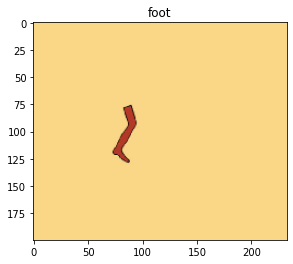

In [68]:
img5, _ = test_set.next()
img5Redim = np.expand_dims(img5[0], axis=0)
Y5 = cnn1.predict(img5Redim)
y5 = np.argmax(Y5, axis=1)
class5 = list(train_set.class_indices.keys())[list(train_set.class_indices.values()).index(y5[0])]
plt.title(class5)
plt.imshow(img5[0])
plt.show()